This will be simple kernel showcasing some analysis of the Titanic competetion dataset. We will first begin by importing the data and some packages. I will also be using a multiplotter function that will make comparison graphs easier to view.

In [3]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions
library(data.table) # for reading the data using fread
library(randomForest) # for modelling
library(mice) # for filling in missing information
library(ggthemes) # for some plot themes
library(Rmisc) # for multiplot function
library(scales) # for graphs
## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")
train <- fread('../input/titanic/train.csv',stringsAsFactors = F)
test <- fread('../input/titanic/test.csv', stringsAsFactors = F)
## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

[1] "titanic"

First, lets take a look at our data. There are 891 rows for the training dataset, and 418 rows for the test dataset. There is a missing column for the test dataset, which contains whether or not the passenger Survived. So, simply add a new column (test$Survived) with all zeros and then combine the two sets. This will make it easier to mutate or change the way certain variables appear, and so lead to better predictions. It's also convienient to remember which part of the dataset is 'Train' and which is 'Test' and, while it could be done using the rows to identify them (1:891 is train and the rest is test), my preference is to use another column. But that doesn't really matter. Once that is done, the data is combined into a new dataframe named all.

In [4]:
dim(train)
dim(test)
head(test)
head(train)


test$Survived <- 0
train$Set <- 'Train'
test$Set <- 'Test'
dim(train)
dim(test)

all<- rbind(train,test)
dim(all)

[1] 891  12

[1] 418  11

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


[1] 891  13

[1] 418  13

[1] 1309   13

**First Look At DATA - Completeness**
# 
# Lets begin by checking the data for completeness. There are 264 rows with incomplete data. The most common missing value is Age. Age will be dealt with later using the mice library. 
# 
#

In [5]:
all[!complete.cases(all),]
table(all$Cabin =='')

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Set
<int>,<dbl>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,Train
18,1,2,"Williams, Mr. Charles Eugene",male,NA,0,0,244373,13.0000,,S,Train
20,1,3,"Masselmani, Mrs. Fatima",female,NA,0,0,2649,7.2250,,C,Train
27,0,3,"Emir, Mr. Farred Chehab",male,NA,0,0,2631,7.2250,,C,Train
29,1,3,"O'Dwyer, Miss. Ellen """"Nellie""""",female,NA,0,0,330959,7.8792,,Q,Train
30,0,3,"Todoroff, Mr. Lalio",male,NA,0,0,349216,7.8958,,S,Train
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NA,1,0,PC 17569,146.5208,B78,C,Train
33,1,3,"Glynn, Miss. Mary Agatha",female,NA,0,0,335677,7.7500,,Q,Train
37,1,3,"Mamee, Mr. Hanna",male,NA,0,0,2677,7.2292,,C,Train



FALSE  TRUE 
  295  1014 

One of the caveats of using complete.cases is that if a string is '', it is counted as complete. Let's use a table to see where the cabin value is blank. That is quite a bit of empty strings.
# First, add a deck column so there is no need to worry about room number. Now, using this new column, lets try to approximate what deck passengers are in using the average fare for that deck.

In [6]:


all$Deck <-""
all <-all %>% mutate (Deck = str_sub(Cabin,1,1))

table(all$Deck)


all %>% filter(Deck !='') %>%
  group_by(Deck) %>%
  dplyr::summarise(medianPrice = median(Fare,na.rm =T), meanPrice = mean(Fare,na.rm = T), minPrice = min(Fare,na.rm = T), maxPrice = max(Fare,na.rm =T))


        A    B    C    D    E    F    G    T 
1014   22   65   94   46   41   21    5    1 

Deck,medianPrice,meanPrice,minPrice,maxPrice
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
A,35.0771,41.24431,0.0000,81.8583
B,82.2667,122.38308,0.0000,512.3292
C,86.2896,107.92660,25.7000,263.0000
D,52.5542,53.00734,12.8750,113.2750
E,53.1000,54.56463,8.0500,134.5000
F,13.0000,18.07937,7.2292,39.0000
G,16.7000,14.20500,10.4625,16.7000
T,35.5000,35.50000,35.5000,35.5000


Looking at the table above, its hard to find meaningful information due to the fact that there is quite a bit of overlap using median, mean, min, and max.

Before doing anything, lets see how Deck plays into whether or not a Passenger Survived. 
#

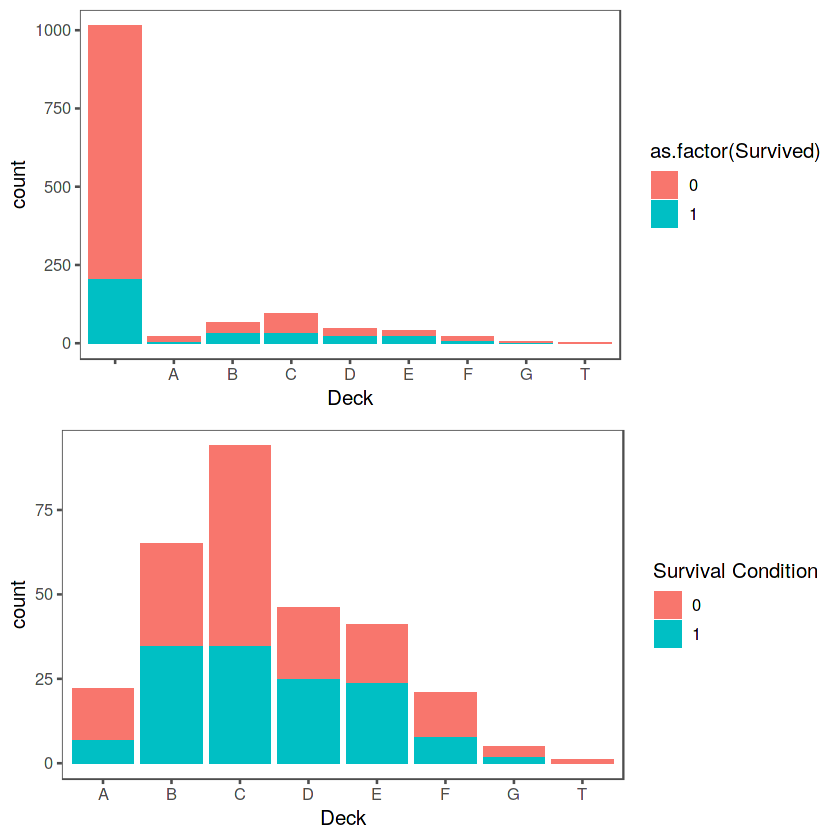

In [7]:
p1 <-all %>% group_by(Deck) %>% 
  ggplot(aes(x=Deck, fill=as.factor(Survived))) +
  geom_bar() + theme_few()

p2 <- all %>% filter(Deck !='') %>% group_by(Deck) %>% 
  ggplot(aes(x=Deck, fill=as.factor(Survived))) +
  geom_bar() + theme_few() + labs(fill = 'Survival Condition')

Rmisc::multiplot(p1,p2)

Looking at the graph, the blank deck dominates the scale, so lets try again after filtering it out. It does seem like you had a better chance of survival if you were some decks as opposed to others. Another thing to consider is how correlated Pclass could be with Deck. Higher socioeconomic class Passengers could be in better cabins.
#

In [8]:
table(all$Deck,all$Pclass)

   
      1   2   3
     67 254 693
  A  22   0   0
  B  65   0   0
  C  94   0   0
  D  40   6   0
  E  34   4   3
  F   0  13   8
  G   0   0   5
  T   1   0   0

Looking at the table, for now lets just leave the Deck field as is with the Unknowns being U. Because there is so much missing data, filling it could lead to some bias.

In [9]:
all$Deck[all$Deck ==''] <- 'U'
table(all$Deck)


   A    B    C    D    E    F    G    T    U 
  22   65   94   46   41   21    5    1 1014 

Going back to the table looking at the summary for each Deck, there seem to be cases where the Fare is 0 which is probably not actually the case. There is also 1 passenger with Fare = NA. These passengers will be treated the same when calculating their Fare. Lets take a look at what values influence Fare. The values that intuitively influence Fare are Pclass and Sex. Age also does but with so many NA values, its best to not include it in our calculations. Another possible value would be the group size. If there are a lot family members travelling together, they could get a discount. This could be explored in the future but for now, the focus will be on Pclass, Sex and Embarked. 
#

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Set,Deck
<int>,<dbl>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
180,0,3,"Leonard, Mr. Lionel",male,36,0,0,LINE,0,,S,Train,U
264,0,1,"Harrison, Mr. William",male,40,0,0,112059,0,B94,S,Train,B
272,1,3,"Tornquist, Mr. William Henry",male,25,0,0,LINE,0,,S,Train,U
278,0,2,"Parkes, Mr. Francis """"Frank""""",male,NA,0,0,239853,0,,S,Train,U
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19,0,0,LINE,0,,S,Train,U
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NA,0,0,239853,0,,S,Train,U
467,0,2,"Campbell, Mr. William",male,NA,0,0,239853,0,,S,Train,U
482,0,2,"Frost, Mr. Anthony Wood """"Archie""""",male,NA,0,0,239854,0,,S,Train,U
598,0,3,"Johnson, Mr. Alfred",male,49,0,0,LINE,0,,S,Train,U



FALSE  TRUE 
 1308     1 

Pclass,meanP,medianP
<int>,<dbl>,<dbl>
1,87.50899,60.0000
2,21.17920,15.0458
3,13.30289,8.0500


Sex,meanP,medianP
<chr>,<dbl>,<dbl>
female,46.1981,23.0000
male,26.1546,11.8875


Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


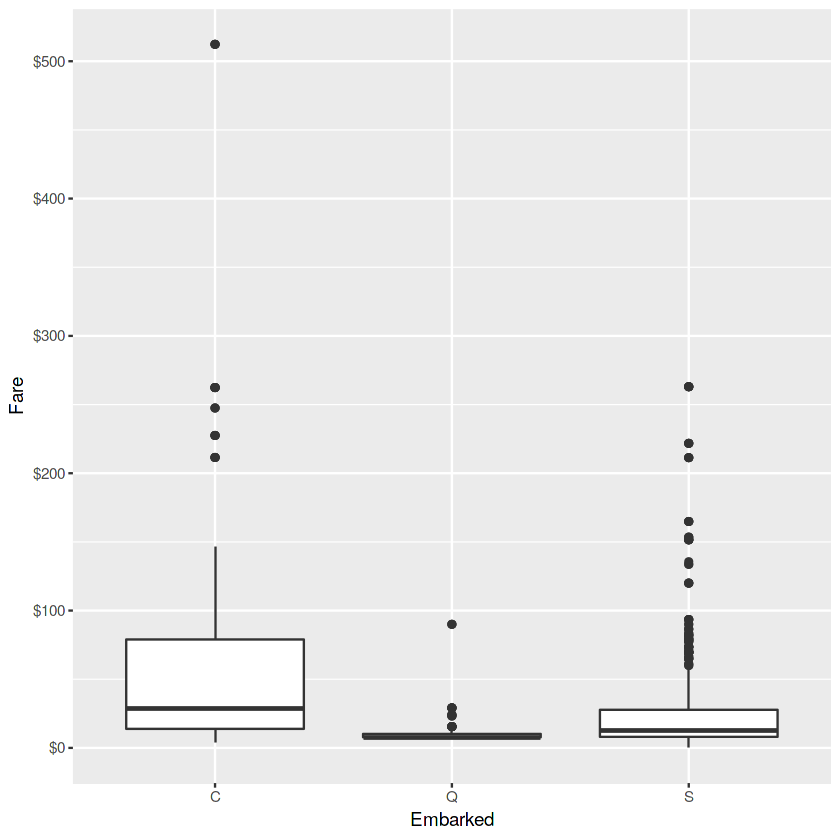

In [10]:
all[all$Fare==0,]
table(is.na(all$Fare))

all %>% group_by(Pclass) %>%
 dplyr::summarise(meanP = mean(Fare,na.rm= T), medianP = median(Fare,na.rm= T),)


all %>% group_by(Sex) %>%
 dplyr::summarise(meanP = mean(Fare,na.rm= T), medianP = median(Fare,na.rm= T),)


all %>% group_by(Embarked) %>% filter(Embarked != '') %>%
  ggplot(aes(x=Embarked, y=Fare)) + geom_boxplot() + scale_y_continuous(labels=dollar_format())

Looking at the boxplot, there does seem to be some correlation between Embarked and Fare, with the the higher Fares being paid by passengers departing from C. Lets create a comparison table.

In [11]:
all %>% group_by(Pclass,Sex,Embarked) %>%
 dplyr::summarise(meanP = mean(Fare,na.rm= T), medianP = median(Fare,na.rm= T),)

Pclass,Sex,Embarked,meanP,medianP
<int>,<chr>,<chr>,<dbl>,<dbl>
1,female,,80.000000,80.00000
1,female,C,118.895949,83.15830
1,female,Q,90.000000,90.00000
1,female,S,101.069145,78.85000
1,male,C,94.622560,62.66875
1,male,Q,90.000000,90.00000
1,male,S,53.670756,35.50000
2,female,C,27.003791,27.72080
2,female,Q,12.350000,12.35000


Looking at the table above, there is a strong case that the female passengers who has a blank embarked field, are from port C or from port S. While this wasn't something that was being looked for, its one less thing to think about.

In [12]:
all[all$Embarked=='',]

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Set,Deck
<int>,<dbl>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,,Train,B
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,,Train,B


There are two passengers who share the same Pclass, Fare, and Sex. The median values for C and S are similar so lets test again using only passengers who survived.

In [13]:
all %>% filter(Survived ==1, Sex =='female', Pclass==1) %>%group_by(Pclass,Sex,Embarked) %>%
 dplyr::summarise(meanP = mean(Fare,na.rm= T), medianP = median(Fare,na.rm= T),)

Pclass,Sex,Embarked,meanP,medianP
<int>,<chr>,<chr>,<dbl>,<dbl>
1,female,,80.0000,80.0000
1,female,C,117.7100,83.1583
1,female,Q,90.0000,90.0000
1,female,S,96.7433,79.2500


A case could be made for the Passengers being from either C or S but since the median of S is closer to the Fare of the two passengers, I will assign them to port S.

In [14]:
all[all$Embarked=='',]$Embarked <- 'S'

Back to Fare, There will be some hardcoding here because I'm not sure on how to go about automating this process. All the Passengers seem to be from port S and are male, so lets use the median Fare for Male passengers from Port S adjusting for each Pclass and fill the 0 values using that.

In [15]:
all[all$Fare==0,]
all %>% filter(Embarked=='S',Sex=='male') %>%
    group_by(Pclass) %>%
    dplyr::summarise(meanFare = mean(Fare,na.rm =T), medianFare = median(Fare,na.rm = T))
all[all$Fare==0 &all$Pclass==1,]$Fare <- 35.50
all[all$Fare==0 &all$Pclass==2,]$Fare <- 13.00
all[all$Fare==0 &all$Pclass==3,]$Fare <- 8.05

all[all$Fare==0,]

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Set,Deck
<int>,<dbl>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
180,0,3,"Leonard, Mr. Lionel",male,36,0,0,LINE,0,,S,Train,U
264,0,1,"Harrison, Mr. William",male,40,0,0,112059,0,B94,S,Train,B
272,1,3,"Tornquist, Mr. William Henry",male,25,0,0,LINE,0,,S,Train,U
278,0,2,"Parkes, Mr. Francis """"Frank""""",male,NA,0,0,239853,0,,S,Train,U
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19,0,0,LINE,0,,S,Train,U
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NA,0,0,239853,0,,S,Train,U
467,0,2,"Campbell, Mr. William",male,NA,0,0,239853,0,,S,Train,U
482,0,2,"Frost, Mr. Anthony Wood """"Archie""""",male,NA,0,0,239854,0,,S,Train,U
598,0,3,"Johnson, Mr. Alfred",male,49,0,0,LINE,0,,S,Train,U


Pclass,meanFare,medianFare
<int>,<dbl>,<dbl>
1,53.67076,35.50
2,20.07332,13.00
3,13.14598,8.05


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Set,Deck
<int>,<dbl>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>


Now there are no longer any zeroes for the Fare value but there is still that 1 NA value. Lets take a glance at that row. It seems that the passenger is a male from Port S in Pclass 3. Fortunately, the median for a passenger with those conditions was already calculated.

In [16]:
all[is.na(Fare),]
all[is.na(Fare),]$Fare <- 8.05

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Set,Deck
<int>,<dbl>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NA,,S,Test,U


**Second Look at Data - Mutating, Etc**
# 
# At this point, other than Age, all NA values should have been dealt with. Cabin will remain as is, so the blanks there don't really matter. Lets start cleaning up our data to make it easier to build the model. The Sex column will be converted to 1s and 0s where 0s are males. The Deck column will also be converted to numbers where A=1, B=2,...,T=8, and U=0.

In [17]:
all <- all %>% mutate(Sex = case_when(Sex =='male'~0,Sex=='female'~1),
               Deck = case_when(Deck=='A'~1, Deck=='B'~2,
                                Deck=='C'~3, Deck=='D'~4,
                                Deck=='E'~5, Deck=='F'~6,
                                Deck=='G'~7, Deck=='T'~8,
                                Deck=='U'~0,))
str(all)


head(all,10)

Classes ‘data.table’ and 'data.frame':	1309 obs. of  14 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : num  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : num  0 1 1 1 0 0 0 0 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...
 $ Set        : chr  "Train" "Train" "Train" "Train" ...
 $ Deck       : num  0 3 0 3 0 0 5 0 0 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Set,Deck
<int>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,,S,Train,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,38,1,0,PC 17599,71.2833,C85,C,Train,3
3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,,S,Train,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,Train,3
5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,,S,Train,0
6,0,3,"Moran, Mr. James",0,NA,0,0,330877,8.4583,,Q,Train,0
7,0,1,"McCarthy, Mr. Timothy J",0,54,0,0,17463,51.8625,E46,S,Train,5
8,0,3,"Palsson, Master. Gosta Leonard",0,2,3,1,349909,21.0750,,S,Train,0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27,0,2,347742,11.1333,,S,Train,0


Taking a look at the Name column, all the Passengers have a title that precedes their Name. There is also the Surname portion which could help when grouping passengers into Families. Lets do some string mutation using regex to isolate what we want.

In [18]:
all$title <-  gsub('(.*, )|(\\..*)', '', all$Name)

head(all,10)

table(all$title)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Set,Deck,title
<int>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,,S,Train,0,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,38,1,0,PC 17599,71.2833,C85,C,Train,3,Mrs
3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,,S,Train,0,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,Train,3,Mrs
5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,,S,Train,0,Mr
6,0,3,"Moran, Mr. James",0,NA,0,0,330877,8.4583,,Q,Train,0,Mr
7,0,1,"McCarthy, Mr. Timothy J",0,54,0,0,17463,51.8625,E46,S,Train,5,Mr
8,0,3,"Palsson, Master. Gosta Leonard",0,2,3,1,349909,21.0750,,S,Train,0,Master
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27,0,2,347742,11.1333,,S,Train,0,Mrs



        Capt          Col          Don         Dona           Dr     Jonkheer 
           1            4            1            1            8            1 
        Lady        Major       Master         Miss         Mlle          Mme 
           1            2           61          260            2            1 
          Mr          Mrs           Ms          Rev          Sir the Countess 
         757          197            2            8            1            1 

Looking at the table above, there are a lot of titles worn by less than 10 people. The titles will just be grouped into a title called 'Other'.

In [19]:
otherTitles <- c('Capt','Col','Dona','Don','Dr','Jonkheer','Lady','Major','Mlle','Mme','Ms','Rev','Sir','the Countess')


all$title[all$title %in% otherTitles] <- 'Other'
table(all$title)


Master   Miss     Mr    Mrs  Other 
    61    260    757    197     34 

Following that, lets see whether or not family size has an impact on Survival.
# First, create a new column whose value is equal to the sum of SibSp and Parch +1. This will state how many family members are there for a passenger. Then, the families will be classified
# into groups based on their size. A famiily size of 1 is an individual, size >1 and <= 4 will be medium, and anything greater than 4 will be large.

In [20]:
all$Fsize <- all$SibSp + all$Parch +1
all <- all %>%
  mutate(FGroup = case_when(Fsize ==1~'Single',Fsize >1 & Fsize <=4~'Med',
                            Fsize >4~'Large'))

table(all$FGroup)


 Large    Med Single 
    82    437    790 

Lastly, the Age column. There are 263 missing values in this column and it could be major factor in survival. This column will be filled in using the 'mice' package. 'mice' stands for Multivariate Inputation using Chained Equations and can be used to fill in missing values. First lets make sure how many missing values we have in the dateset.

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Set,Deck,title,Fsize,FGroup,Age,
1046,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
263,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,263,263


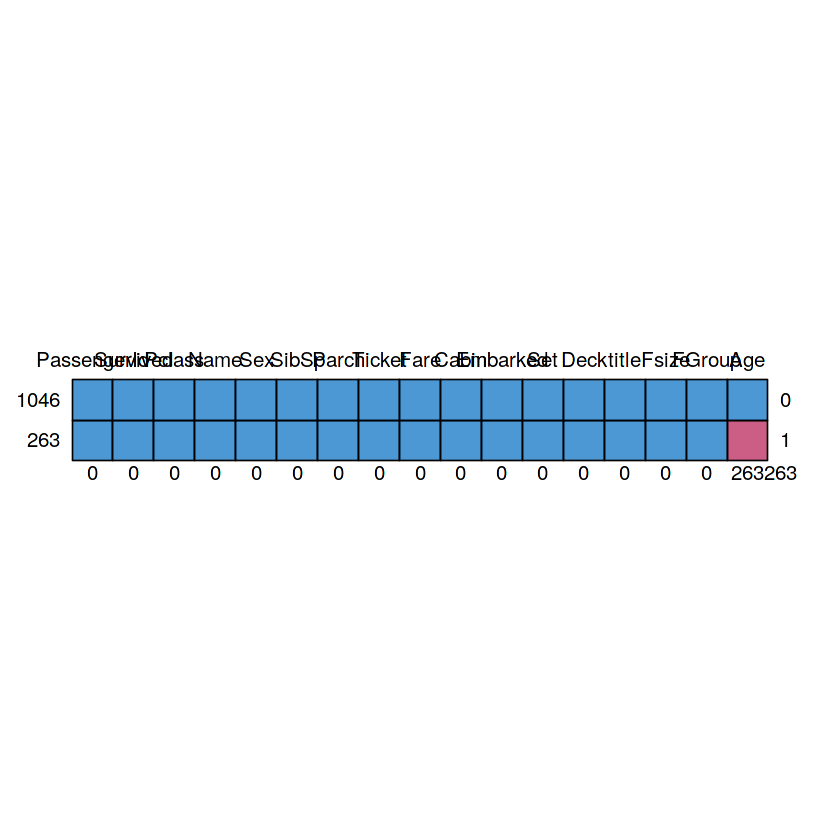

In [21]:
md.pattern(all)

The above graph tells us that there 1046 rows where there are 0 missing fields, and 263 rows where there is a missing value (Age). Before mice is applied to the data, lets factorize some variables that should be factors. These include Survived, Deck, Fsize, FGroup, Title, Sex, Pclass ,and Embarked. Then, set a random seed to make sure the data is replicable.
#

In [22]:
set.seed(1234)

all <-all %>% dplyr::mutate(Survived = as.factor(Survived),
                       Deck = as.factor(Deck),
                       Fsize = as.factor(Fsize),
                       FGroup = as.factor(FGroup),
                       title = as.factor(title),
                       Sex = as.factor(Sex),
                       Pclass = as.factor(Pclass),
                       Embarked = as.factor(Embarked)) %>%
    dplyr::rename(Title = title)


ignoredCols <- c('Name','Cabin','Ticket','FGroup','Survived')
ind <- mice(all[,!names(all) %in% ignoredCols], method = 'rf')

miceComplete <- complete(ind)


 iter imp variable
  1   1  Age
  1   2  Age
  1   3  Age
  1   4  Age
  1   5  Age
  2   1  Age
  2   2  Age
  2   3  Age
  2   4  Age
  2   5  Age
  3   1  Age
  3   2  Age
  3   3  Age
  3   4  Age
  3   5  Age
  4   1  Age
  4   2  Age
  4   3  Age
  4   4  Age
  4   5  Age
  5   1  Age
  5   2  Age
  5   3  Age
  5   4  Age
  5   5  Age


Warning message:
“Number of logged events: 26”


* So now that the mice imputations are done, lets just do a quick comparison of the ages generated by mice and the ones that were in our data. This will be by just looking at the density of the data.

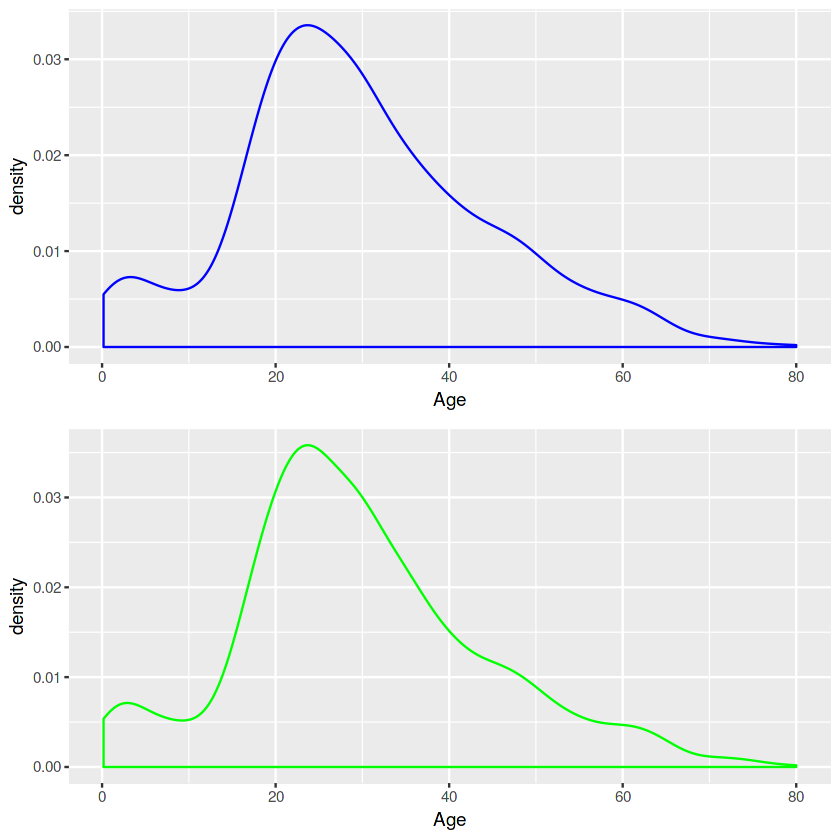

In [23]:
p1 <-all %>% filter(!is.na(Age)) %>%
ggplot(aes(x=Age)) +
geom_density(col='blue')
p2 <- miceComplete %>%
ggplot(aes(x=Age)) +
geom_density(col='green')
Rmisc::multiplot(p1,p2)

It looks fine so its time to replace the Age field with the values genereated by mice. A quick check to make sure that our data is complete

 /\     /\
{  `---'  }
{  O   O  }
==>  V <==  No need for mice. This data set is completely observed.
 \  \|/  /
  `-----'



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Set,Deck,Title,Fsize,FGroup,
1309,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


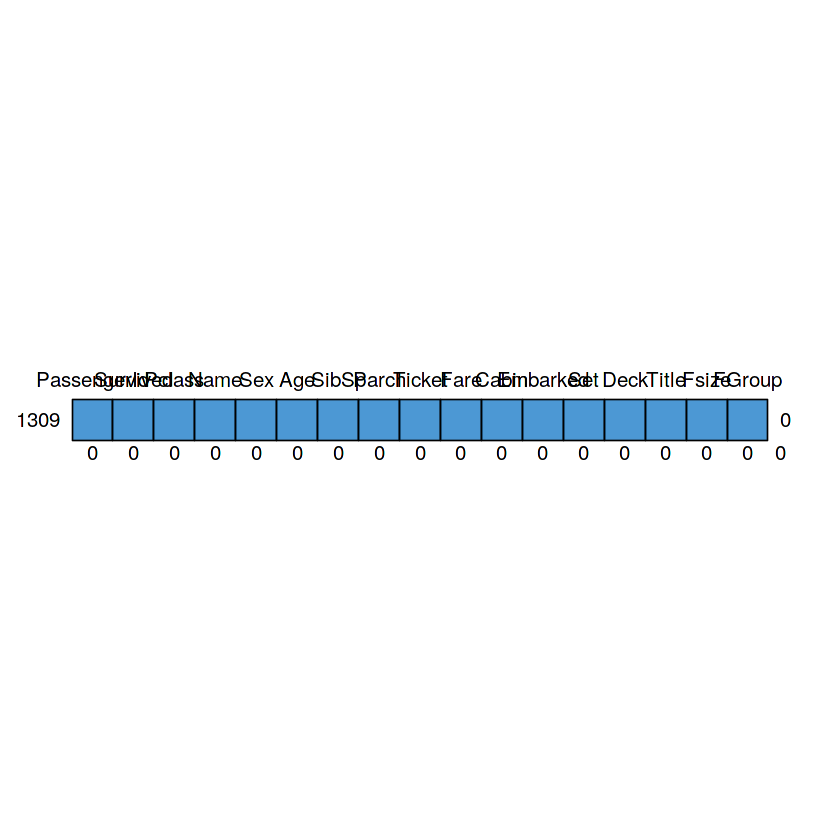

In [24]:
all$Age <- miceComplete$Age

md.pattern(all)

There are still some more columns that could be improved upon. Now that age is complete, it can be grouped into a factor column using ranges.
#

In [25]:

all <- all %>% mutate(
  AgeGroup = case_when(Age <13~'Child',Age>=13 & Age <20~'Teen',
                       Age >=20 & Age <30~'Young Adult',
                       Age >= 30 & Age <55~'Adult',Age >=55~'Senior')
)
table(all$AgeGroup)
all$AgeGroup <- as.factor(all$AgeGroup)


      Adult       Child      Senior        Teen Young Adult 
        510         108          83         158         450 

**Time to look at Some Graphs!**
# 
# Now that the data has been modified to fit some requirements, lets take a look at how Survived is influenced by other variables.
# First, Age group.

AgeGroup,Sex,Survivors,count,percentage
<fct>,<fct>,<dbl>,<int>,<dbl>
Adult,0,44,337,0.13056380
Adult,1,97,173,0.56069364
Child,0,23,56,0.41071429
Child,1,20,52,0.38461538
Senior,0,6,59,0.10169492
Senior,1,10,24,0.41666667
Teen,0,6,84,0.07142857
Teen,1,43,74,0.58108108
Young Adult,0,30,307,0.09771987


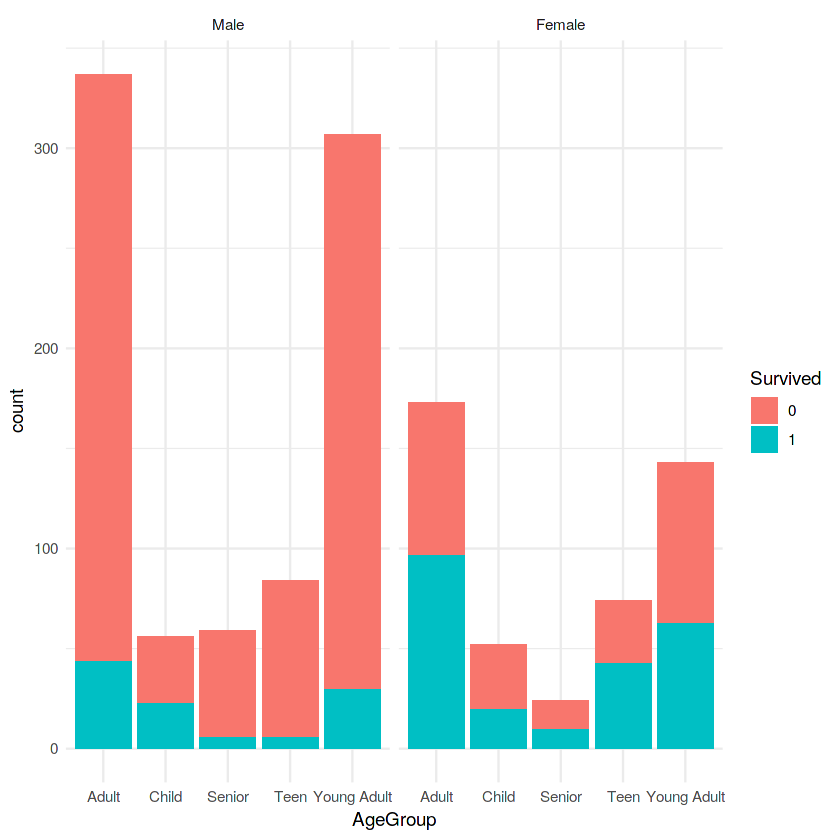

In [26]:

all %>%
  ggplot(aes(AgeGroup,fill=Survived))+
  geom_bar() +facet_grid(.~Sex,
                         labeller = as_labeller(c(`0` = "Male",  `1` = 'Female')) ) +
theme_minimal()

all %>%
  group_by(AgeGroup,Sex) %>%
  dplyr::summarise(Survivors = sum(as.numeric(as.character(Survived))), count =n(),
                   percentage = Survivors/count)

Across the board, if you were female, your survival odds went up by a lot. But lets try age group without separating the sexes, just to see what was the safest and least safe group to be in.

AgeGroup,Survivors,count,percentage
<fct>,<dbl>,<int>,<dbl>
Adult,141,510,0.2764706
Child,43,108,0.3981481
Senior,16,83,0.1927711
Teen,49,158,0.3101266
Young Adult,93,450,0.2066667


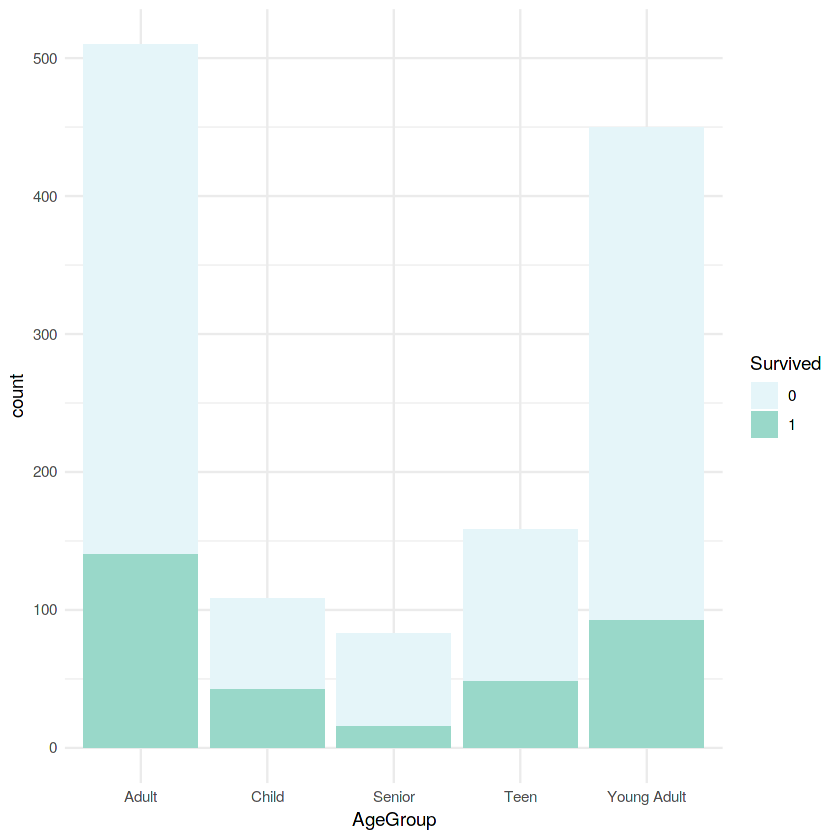

In [27]:
all %>%
  ggplot(aes(AgeGroup,fill=Survived))+ geom_bar() +
  scale_fill_brewer(palette = 2) +  
theme_minimal()

all %>%
  group_by(AgeGroup) %>%
  dplyr::summarise(Survivors = sum(as.numeric(as.character(Survived))), count =n(),
                   percentage = Survivors/count)

Looking at the graph and the numbers, the safest group to be in was the child group. Oddly enough, it wasn't that much safer to be a Young Adult, compared to the least safe Senior group.
# Looking at the data with genders separate, the safest person on the ship seemed to be a Teenaged Girl. Conversely, if you were a Teenaged Male, the odds were not in your favor.
# 
# Following the age groups, lets move on to Pclass.

Pclass,Sex,Survivors,count,percentage
<fct>,<fct>,<dbl>,<int>,<dbl>
1,0,45,179,0.25139665
1,1,91,144,0.63194444
2,0,17,171,0.09941520
2,1,70,106,0.66037736
3,0,47,493,0.09533469
3,1,72,216,0.33333333


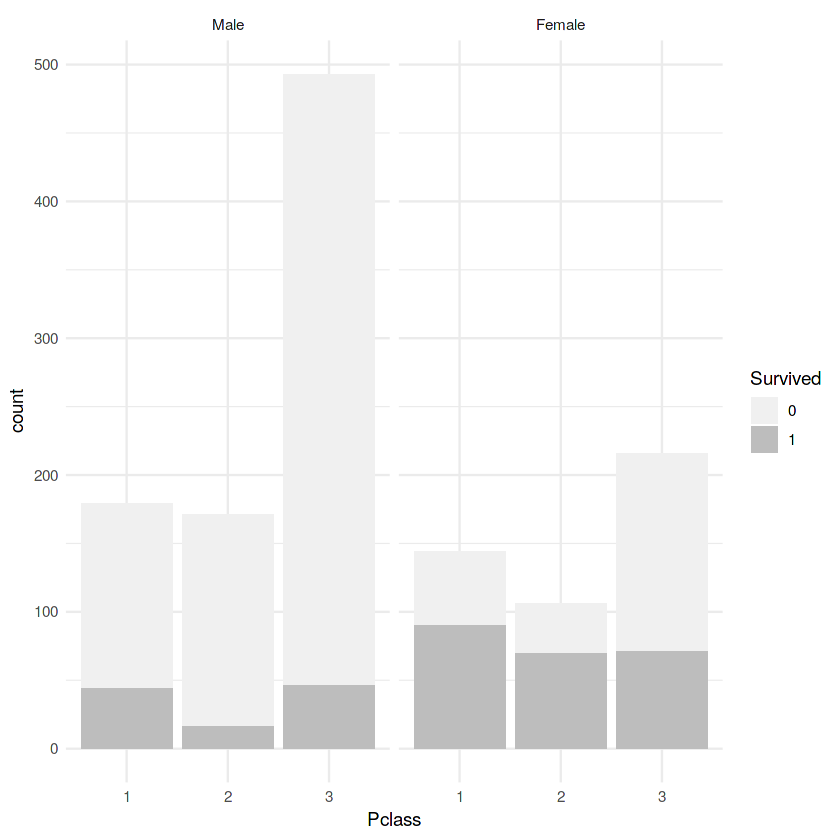

In [28]:
all %>% group_by(Pclass) %>%
ggplot(aes(x=Pclass, fill=Survived)) + geom_bar()+
scale_fill_brewer(palette =6) +
facet_grid(.~Sex,labeller = as_labeller(c(`0` = "Male",  `1` = 'Female')) ) +
theme_minimal()

all %>%
  group_by(Pclass,Sex) %>%
  dplyr::summarise(Survivors = sum(as.numeric(as.character(Survived))), count =n(),
                   percentage = Survivors/count)

Looking at the split, the most deaths are from male passengers in Pclass 3. The least deaths are from the female passengers in Pclass in 1.

Pclass,Survivors,count,percentage
<fct>,<dbl>,<int>,<dbl>
1,136,323,0.4210526
2,87,277,0.3140794
3,119,709,0.1678420


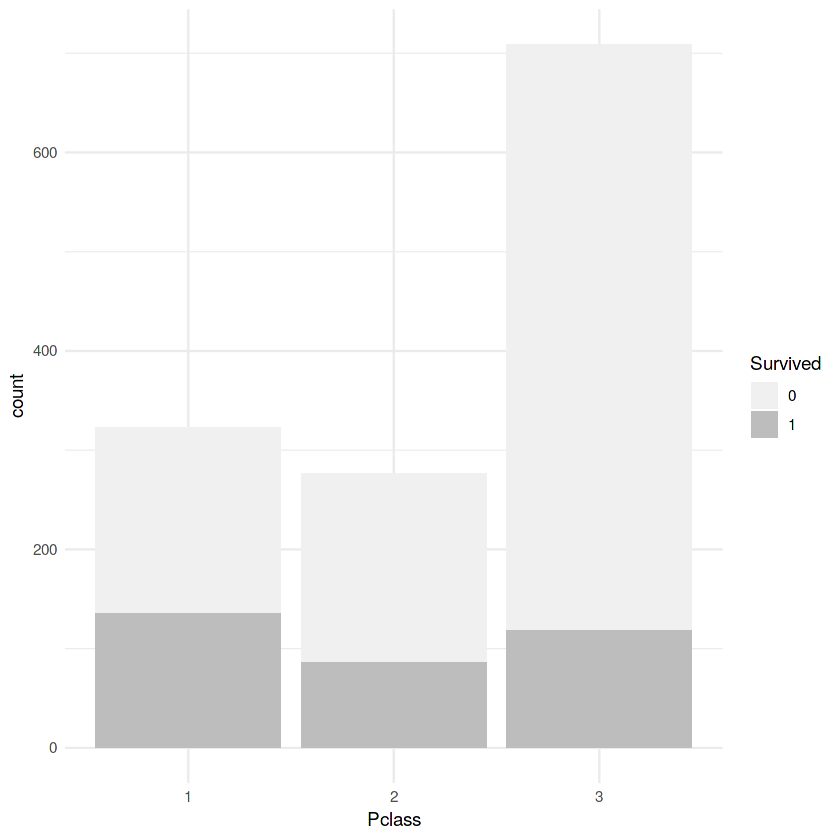

In [29]:
all %>%
  ggplot(aes(Pclass,fill=Survived))+ geom_bar() +
  scale_fill_brewer(palette = 6) +  
theme_minimal()

all %>%
  group_by(Pclass) %>%
  dplyr::summarise(Survivors = sum(as.numeric(as.character(Survived))), count =n(),
                   percentage = Survivors/count)

As a whole, the safest place to be was in P class 1.

Sex,Survivors,count,percentage
<fct>,<dbl>,<int>,<dbl>
0,109,843,0.1293001
1,233,466,0.5000000


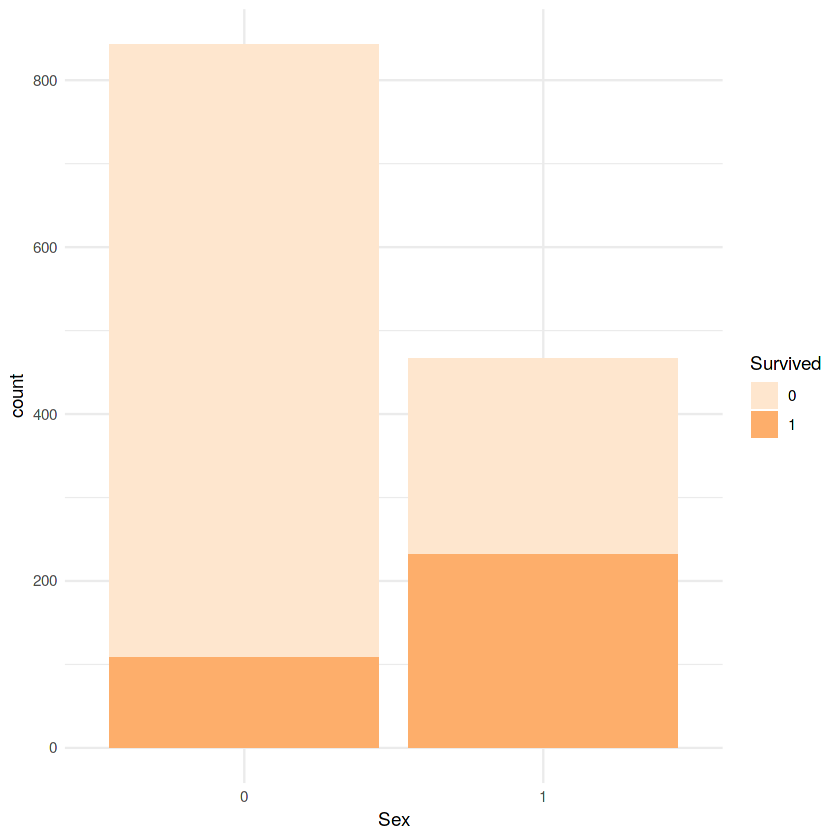

In [30]:
all %>%
  ggplot(aes(Sex,fill=Survived))+ geom_bar() +
  scale_fill_brewer(palette = 7) +  
theme_minimal()


all %>%
  group_by(Sex) %>%
  dplyr::summarise(Survivors = sum(as.numeric(as.character(Survived))), count =n(),
                   percentage = Survivors/count)

Based on all the graphs seen, the statement 'Women and children first' was very true for the Titanic disaster. 50% of women passengers on the ship survived.
# 
# Lets just create a few more graphs using the Fsize, FGroup, Title, and Embarked
# 
# 
# Fsize

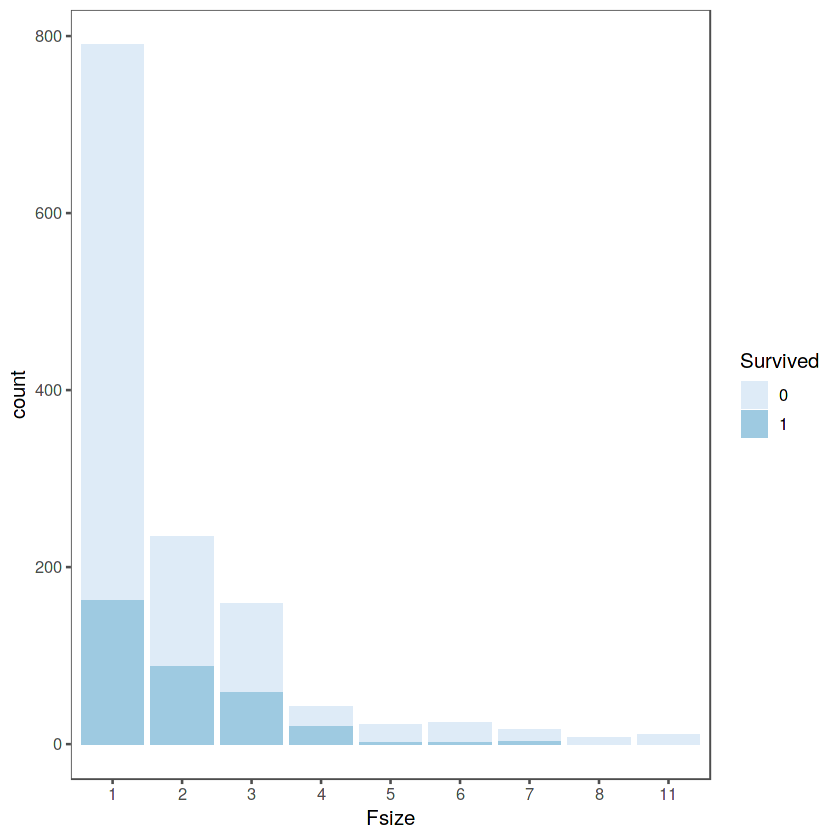

In [31]:
all %>%
  ggplot(aes(Fsize,fill=Survived))+ geom_bar() +
  scale_fill_brewer(palette = 'Blues') +  
theme_few()

FGroup
# 
#

FGroup,Survivors,count,percentage
<fct>,<dbl>,<int>,<dbl>
Large,10,82,0.1219512
Med,169,437,0.3867277
Single,163,790,0.2063291


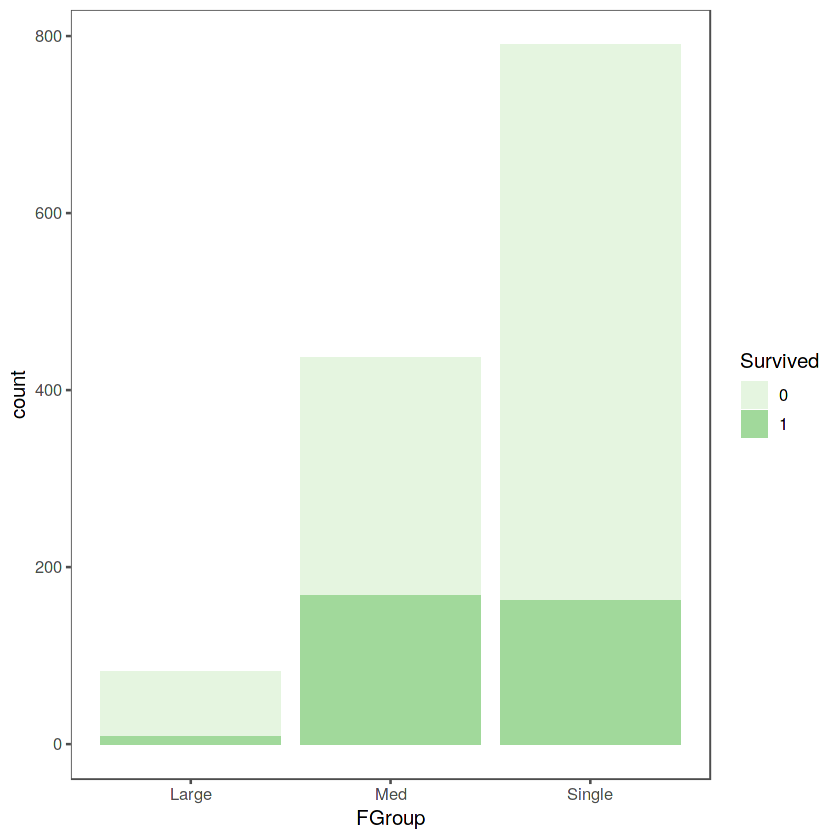

In [32]:
all %>%
  ggplot(aes(FGroup,fill=Survived))+ geom_bar() +
  scale_fill_brewer(palette = 'Greens') +  
theme_few()

all %>%
  group_by(FGroup) %>%
  dplyr::summarise(Survivors = sum(as.numeric(as.character(Survived))), count =n(),
                   percentage = Survivors/count)

Title

Title,Survivors,count,percentage
<fct>,<dbl>,<int>,<dbl>
Master,23,61,0.3770492
Miss,127,260,0.4884615
Mr,81,757,0.1070013
Mrs,99,197,0.5025381
Other,12,34,0.3529412


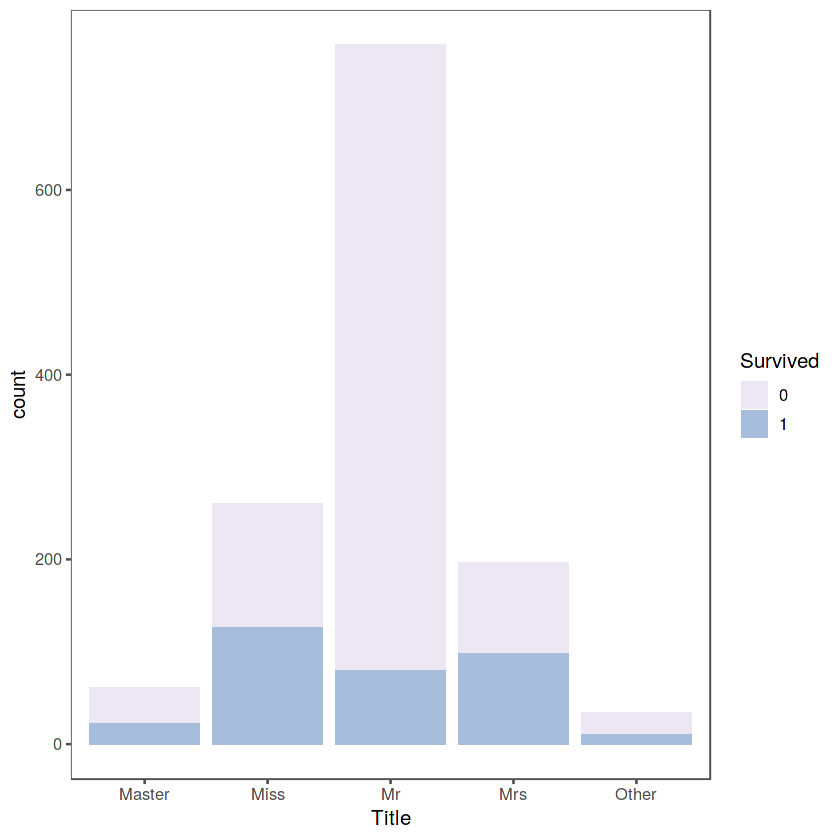

In [33]:
all %>%
  ggplot(aes(Title,fill=Survived))+ geom_bar() +
  scale_fill_brewer(palette = 'PuBu') +  
theme_few()

all %>%
  group_by(Title) %>%
  dplyr::summarise(Survivors = sum(as.numeric(as.character(Survived))), count =n(),
                   percentage = Survivors/count)

Embarked

Embarked,Survivors,count,percentage
<fct>,<dbl>,<int>,<dbl>
C,93,270,0.3444444
Q,30,123,0.2439024
S,219,916,0.2390830


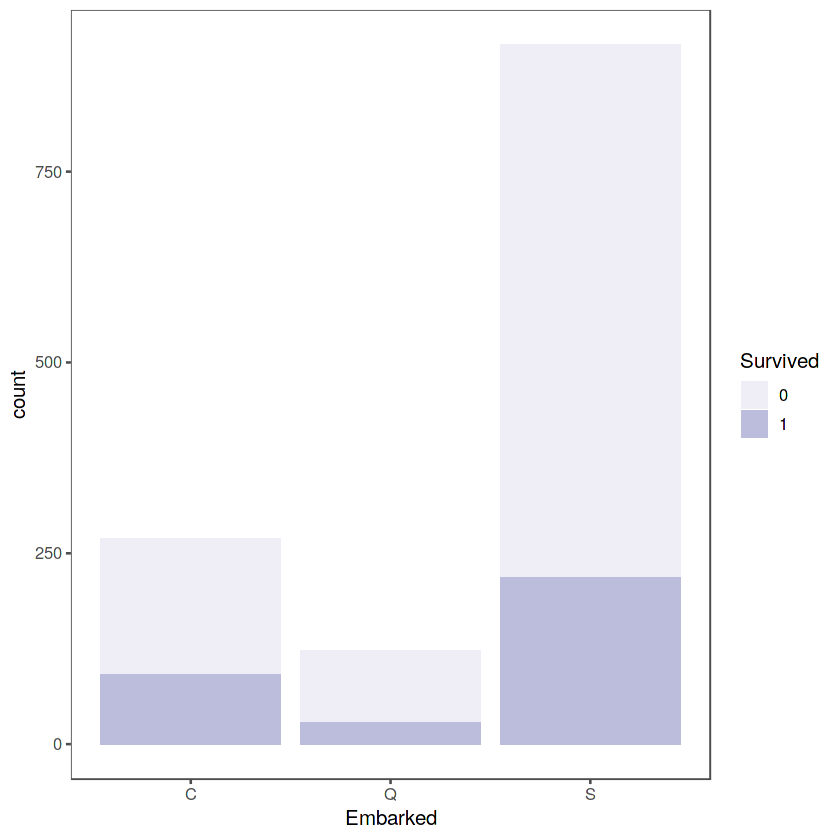

In [34]:
all %>%
  ggplot(aes(Embarked,fill=Survived))+ geom_bar() +
  scale_fill_brewer(palette = 'Purples') +  
theme_few()

all %>%
  group_by(Embarked) %>%
  dplyr::summarise(Survivors = sum(as.numeric(as.character(Survived))), count =n(),
                   percentage = Survivors/count)

**Time to build our prediction model.**
# 
# We will be using randomForests for now. Maybe later, we can explore different models and their predictiveness.
# 
#

In [35]:
train <- all[all$Set=='Train',]
test <- all[all$Set=='Test',]

set.seed(111)
rfModel <- randomForest(Survived~Deck+Pclass+Fare+
                        Fsize+FGroup+Embarked+
                          Title+AgeGroup+Sex+ Age,
                        data= train)
rfModel


Call:
 randomForest(formula = Survived ~ Deck + Pclass + Fare + Fsize +      FGroup + Embarked + Title + AgeGroup + Sex + Age, data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 17.06%
Confusion matrix:
    0   1 class.error
0 493  56   0.1020036
1  96 246   0.2807018

With our Model built, we can use it on our test set and then submit our answer.

In [36]:
prediction <- predict(rfModel, test)
submission <- data.frame(PassengerID = test$PassengerId, Survived = prediction)